## Descrição dos experimentos

### Sequencial
Foram realizadas 10 medições para cada cenário do programa sequencial. As variações incluíram modificar a imagem gerada e o seu tamanho (uma potência de 2 entre $2^{4}$ e $2^{13}$).

### Pthread e OMP
Além dos mesmos experimentos feitos na versão sequencial, também foram realizados experimentos alterando o número de threads (uma potência de 2 entre $2^{0}$ e $2^{5}$).

### Flag -O3
Incluímos também um experimento utilizando a flag do compilador -O3 para os algoritmos sequencial, Pthread e OMP, porém testamos sem instruções de alocação de memória.

## Análises e gráficos
Para começar a análise dos dados e sua visualização, precisamos importar as bibliotecas conforme comando abaixo:

In [61]:
import Pkg; Pkg.add("CSV"); Pkg.add("DataFrames"); Pkg.add("Gadfly");
using CSV
using DataFrames
using Gadfly
# using CategoricalArrays
set_default_plot_size(21cm, 12cm)

Os resultados dos experimentos se encontram no arquivo results.tsv, que vamos armazenar em um dataframe df.

In [36]:
df = DataFrame(CSV.File("results.tsv", header=1, delim="\t"))
first(df, 5)

5×13 DataFrame
 Row │ Algorithm       Image         Size   Threads  Time      Stddev    Clock ⋯
     │ String          String        Int64  Int64    Float64   Float64   Strin ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ mandelbrot_seq  elephant.log     16        1  0.001221  4.25e-5   0.87  ⋯
   2 │ mandelbrot_seq  elephant.log     32        1  0.00255   0.000221  2.16
   3 │ mandelbrot_seq  elephant.log     64        1  0.009084  0.000776  8.7
   4 │ mandelbrot_seq  elephant.log    128        1  0.02641   0.000716  26.04
   5 │ mandelbrot_seq  elephant.log    256        1  0.09824   0.00904   97.76 ⋯
                                                               7 columns omitted

## Análise dos dados 
Vamos começar as análises desconsiderando os dados que estão marcados com a flag de otimização -O3

In [38]:
df = filter(row -> row.O3 == 0, df)
first(df, 5)

5×13 DataFrame
 Row │ Algorithm       Image         Size   Threads  Time      Stddev    Clock ⋯
     │ String          String        Int64  Int64    Float64   Float64   Strin ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ mandelbrot_seq  elephant.log     16        1  0.001221  4.25e-5   0.87  ⋯
   2 │ mandelbrot_seq  elephant.log     32        1  0.00255   0.000221  2.16
   3 │ mandelbrot_seq  elephant.log     64        1  0.009084  0.000776  8.7
   4 │ mandelbrot_seq  elephant.log    128        1  0.02641   0.000716  26.04
   5 │ mandelbrot_seq  elephant.log    256        1  0.09824   0.00904   97.76 ⋯
                                                               7 columns omitted

Agora, podemos visualizar o comportamento geral pelo tamanho de entrada e número de threads para cada algoritmo  (gráfico 1) e para cada região do conjunto Mandelbrot (gráfico 2):

### Gráfico 1 - comportamento de cada região por thread e tamanho

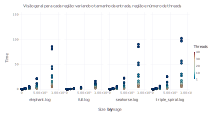

In [94]:
plot(df, xgroup=:Image, 
    x=:Size, 
    y=:Time, 
    color=:Threads, 
    Geom.subplot_grid(Geom.point),
    Guide.title("Visão geral para cada região: variando o tamanho da entrada, região e número de threads"))

### Gráfico 2 - comportamento de cada algoritmo por thread e tamanho

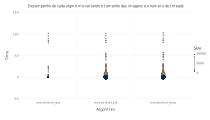

In [95]:
plot(df, 
    x=:Algorithm, 
    y=:Time, 
    color=:Size, 
    size=:Threads, 
    Geom.point,
    Guide.title("Desempenho de cada algoritmo variando o tamanho das imagens e o número de threads"))

O gráfico acima mostra como as variações do tamanho das imagens e a quantidade de threads impactam o tempo de execução do algoritmo. Nesse caso, os círculos de diferentes tamanhos são proporcionais à quantidade de threads do experimento e, a partir disso, fica clara a relação inversamente proporcional entre threads e tempo.

Quando os círculos representado uma única thread são levados em conta, não há diferença notável entre os três algoritmos, uma vez que além de executarmos o progama de maneira análoga ao sequencial. Da mesma maneira, a criação de um número grande de threads para pequenos tamanhos de entrada também não se mostra muito vantajosa em relação ao programa sequencial. 

No gráfico 3 ilustramos o desempenho semelhante dos três algoritmos utilizando apenas uma thread para gerar a imagem full. 

In [96]:
# separar cada região
df_full = filter(row -> row.Image == "full.log", df)
df_elephant = filter(row -> row.Image == "elephant.log", df)
df_seahorse = filter(row -> row.Image == "seahorse.log", df)
df_triple_spiral = filter(row -> row.Image == "triple_spiral.log", df);

### Gráfico 3 - comportamento de cada algoritmo com uma thread na imagem Full

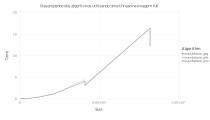

In [98]:
df_full_1thread = filter(row -> row.Threads == 1, df_full)
plot(df_full_1thread, 
    x=:Size, 
    y=:Time, 
    color=:Algorithm, 
    Geom.line, 
    Guide.title("Desempenho dos algoritmos utilizando uma thread na imagem full"))

Ademais, apartando essas casos específicos vemos, como já era esperado, que ao aumentarmos o número de threads, mais rápida é a execução do programa e que com o aumento do tamanho de entrada, maior é o tempo. Dessa maneira, para termos um bom desempenho em relação ao tempo de execução, ao aumentarmos o tamanho, precisamos aumentar o número de threads.

Outra análise a ser feita é o desempenho dos 3 algoritmos separadamente em relação a cada região do conjunto Mandelbrot, que ilustraremos abaixo nos gráficos 4, 5, 6 e 7.

### Gráfico 4 - comportamento de cada algoritmo em relação a imagem Full

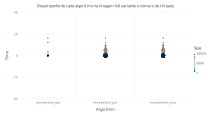

In [100]:
plot(df_full, 
    x=:Algorithm,
    y=:Time, 
    color=:Size, 
    size=:Threads,
    Geom.point,
    Guide.title("Desempenho de cada algoritmo na imagem full variando o número de threads"))

### Gráfico 5 - comportamento de cada algoritmo em relação a região Elephant

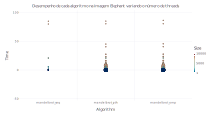

In [101]:
plot(df_elephant, 
    x=:Algorithm, 
    y=:Time, 
    color=:Size, 
    size=:Threads, 
    Geom.point,
    Guide.title("Desempenho de cada algoritmo na imagem Elephant variando o número de threads"))

### Gráfico 6 - comportamento de cada algoritmo em relação a região Seahorse

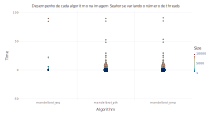

In [102]:
plot(df_seahorse, 
    x=:Algorithm, 
    y=:Time, 
    color=:Size, 
    size=:Threads, 
    Geom.point,
    Guide.title("Desempenho de cada algoritmo na imagem Seahorse variando o número de threads"))

### Gráfico 7 - comportamento de cada algoritmo em relação a região Triple Spiral

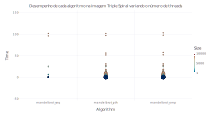

In [103]:
plot(df_triple_spiral, 
    x=:Algorithm, 
    y=:Time, 
    color=:Size, 
    size=:Threads, 
    Geom.point,
    Guide.title("Desempenho de cada algoritmo na imagem Triple Spiral variando o número de threads"))

Podemos ainda analisar qual é o impacto causado no tempo pela execução das instruções de alocação de memória para cada região do conjunto, conforme mostram os gráficos 8, 9, 10 e 11.

### Gráfico 8 - impacto da alocação de memória para região Elephant

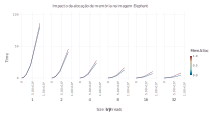

In [104]:
plot(df_elephant, 
    xgroup=:Threads, 
    x=:Size, 
    y=:Time, 
    color=:MemAlloc, 
    Geom.subplot_grid(Geom.line),
    Guide.title("Impacto da alocação de memória na imagem Elephant"))

### Gráfico 9 - impacto da alocação de memória para região Seahorse

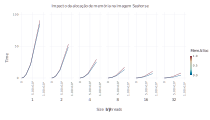

In [105]:
plot(df_seahorse, 
    xgroup=:Threads, 
    x=:Size, 
    y=:Time, 
    color=:MemAlloc, 
    Geom.subplot_grid(Geom.line),
     Guide.title("Impacto da alocação de memória na imagem Seahorse"))

### Gráfico 10 - impacto da alocação de memória para região Triple Spiral

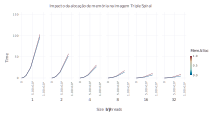

In [106]:
plot(df_triple_spiral, 
    xgroup=:Threads, 
    x=:Size, 
    y=:Time, 
    color=:MemAlloc, 
    Geom.subplot_grid(Geom.line),
     Guide.title("Impacto da alocação de memória na imagem Triple Spiral"))

### Gráfico 11 - impacto da alocação de memória para imagem Full

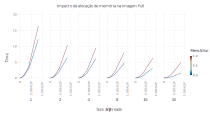

In [107]:
plot(df_full, 
    xgroup=:Threads, 
    x=:Size, 
    y=:Time, 
    color=:MemAlloc, 
    Geom.subplot_grid(Geom.line),
     Guide.title("Impacto da alocação de memória na imagem Full"))

### Gráfico 12 - impacto da alocação de memória no algoritmo sequencial para imagem Full

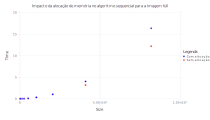

In [108]:
df_seq_full = filter(row -> row.Algorithm == "mandelbrot_seq", df_full)
df_seq_alloc = filter(row -> row.MemAlloc == 1, df_seq_full)
df_seq_no_alloc = filter(row -> row.MemAlloc == 0, df_seq_full)
point_alloc = layer(df_seq_alloc, x="Size", y="Time", Geom.point,Theme(default_color=colorant"blue"))
point_no_aloc = layer(df_seq_no_alloc, x="Size", y="Time", Geom.point,Theme(default_color=colorant"red"))
plot(point_alloc,
    point_no_aloc,
    Guide.manual_color_key("Legenda", ["Com alocação", "Sem alocação"], ["blue", "red"]),
    Guide.title("Impacto da alocação de memória no algoritmo sequencial para a imagem full"))

In [109]:
describe(df)

13×7 DataFrame
 Row │ variable      mean      min             median     max                n ⋯
     │ Symbol        Union…    Any             Union…     Any                I ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Algorithm               mandelbrot_omp             mandelbrot_seq       ⋯
   2 │ Image                   elephant.log               triple_spiral.log
   3 │ Size          1636.8    16              384.0      8192
   4 │ Threads       9.76923   1               4.0        32
   5 │ Time          4.02475   0.000848        0.0379205  103.164              ⋯
   6 │ Stddev        0.020846  1.15e-5         0.00112    0.237
   7 │ Clock                   0.38                       996.22
   8 │ CPUs          4.97794   0.445           2.1035     28.868
   9 │ Cycles                  1,025,999,471              98,973,475,178       ⋯
  10 │ Instructions            1,004,161,076              99,656,522
  11 │ IO            0.0       0               0.0        0
  12 │ MemAlloc      0.5       0               0.5        1
  13 │ O3            0.0       0               0.0        0                    ⋯
                                                               2 columns omitted

In [110]:
# Displaying column types
eltype.(eachcol(df))

13-element Vector{DataType}:
 String
 String
 Int64
 Int64
 Float64
 Float64
 String
 Float64
 String
 String
 Int64
 Int64
 Int64

In [111]:
# nao funciona nessa versao :(
categorical!(df, :MemAlloc)

LoadError: UndefVarError: categorical! not defined

In [112]:
threads_values = unique(df.Threads)

6-element Vector{Int64}:
  1
  2
  4
  8
 16
 32